In [1]:
#드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("housing/train.csv")
test_data = pd.read_csv("housing/test.csv")

In [4]:
train_data.head()

id  Overall Qual  Gr Liv Area Exter Qual  Garage Cars  Garage Area  \
0   1            10         2392         Ex            3          968   
1   2             7         1352         Gd            2          466   
2   3             5          900         TA            1          288   
3   4             5         1174         TA            2          576   
4   5             7         1958         Gd            3          936   

  Kitchen Qual  Total Bsmt SF  1st Flr SF Bsmt Qual  Full Bath  Year Built  \
0           Ex           2392        2392        Ex          2        2003   
1           Gd           1352        1352        Ex          2        2006   
2           TA            864         900        TA          1        1967   
3           Gd            680         680        TA          1        1900   
4           Gd           1026        1026        Gd          2        2005   

   Year Remod/Add  Garage Yr Blt  target  
0            2003           2003  386250  
1            2007           2006  194000  
2            1967           1967  123000  
3            2006           2000  135000  
4            2005           2005  250000

In [5]:
train = train_data.drop(['id'],axis=1) # id column은 드랍했습니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Overall Qual    1350 non-null   int64 
 1   Gr Liv Area     1350 non-null   int64 
 2   Exter Qual      1350 non-null   object
 3   Garage Cars     1350 non-null   int64 
 4   Garage Area     1350 non-null   int64 
 5   Kitchen Qual    1350 non-null   object
 6   Total Bsmt SF   1350 non-null   int64 
 7   1st Flr SF      1350 non-null   int64 
 8   Bsmt Qual       1350 non-null   object
 9   Full Bath       1350 non-null   int64 
 10  Year Built      1350 non-null   int64 
 11  Year Remod/Add  1350 non-null   int64 
 12  Garage Yr Blt   1350 non-null   int64 
 13  target          1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [6]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
# 코랩에서 진행했을때 위와같이 작성했습니다.
# 로컬에서 사용하실 때는 pip install pandas_profiling으로 하셔도 됩니다!

^C


In [7]:
import pandas_profiling
profile = train.profile_report()
profile

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261270 sha256=8d8087a7dd1724d8c04581a02fa57e47dda36e08d22c847829f571ea27c3a533
  Stored in directory: C:\Users\syi06\AppData\Local\Temp\pip-ephem-wheel-cache-wnlrre7b\wheels\b2\af\cb\ca484c1ce66cdc8b79923c05f88baf514e553437bdc6b334f2
Successfully built pandas-profiling
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.1.0
    Uninstalling tangled-up-in-unicode-0.1.0:
      Successfully uninstalled tangled-up-in-unicode-0.1.0
  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.0.0
    Uninstalling 

* missing value는 존재하지 않습니다.

* Year Remod/Add 가 1950년이 유독 많은 모습입니다.- 의심해볼 필요가 있어보입니다.

* Garage Yr Blt에 extreme values의 Maximum 10 values를 살펴보면 2207년이 존재합니다. 잘못 입력된 것 같습니다. 2010년도 존재하는데 이는 잘못 입력된 것인지 아닌지 확인해볼 필요가 있어보입니다.

* Year Built를 보면 2005년에 지어진 것이 가장 많습니다.

* Exter Qual, Kitchen Qual, Bsmt Qual은 범주형변수로, Po<Fa<TA<Gd<Ex인 것 같습니다. (poor -> Fair -> Typical/Average -> Good -> Excellent) 인코딩 시켜줄 필요가 있어보입니다!

* duplicate row가 하나 존재합니다만 크게 상관은 없을 것 같습니다.

* 집값관련 데이터이다 보니 대부분의 변수가 skewed된 모습입니다! -> 로그변환 등의 방법으로 정규화하면 어떨까요?

In [8]:
#profile.to_file(output_file="profile.html") # html로 리포트를 다운받을 수 있습니다

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
train.corr() # Exter Qual, Kitchen Qual, Bsmt Qual의 범주형변수들을 제외한 상관관계를 살펴봅니다.
#전체적으로 대부분의 변수들이 서로 높은 상관관계를 보입니다.

Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
Overall Qual        1.000000     0.588243     0.571066     0.517218   
Gr Liv Area         0.588243     1.000000     0.516287     0.480863   
Garage Cars         0.571066     0.516287     1.000000     0.840054   
Garage Area         0.517218     0.480863     0.840054     1.000000   
Total Bsmt SF       0.509058     0.419220     0.466017     0.499634   
1st Flr SF          0.476398     0.522535     0.445017     0.485843   
Full Bath           0.554248     0.612423     0.513078     0.418852   
Year Built          0.582875     0.232281     0.505803     0.445816   
Year Remod/Add      0.579142     0.315723     0.433307     0.364369   
Garage Yr Blt       0.553927     0.261861     0.562320     0.536310   
target              0.810607     0.742061     0.634497     0.617151   

                Total Bsmt SF  1st Flr SF  Full Bath  Year Built  \
Overall Qual         0.509058    0.476398   0.554248    0.582875   
Gr Liv Area          0.419220    0.522535   0.612423    0.232281   
Garage Cars          0.466017    0.445017   0.513078    0.505803   
Garage Area          0.499634    0.485843   0.418852    0.445816   
Total Bsmt SF        1.000000    0.868811   0.367648    0.403767   
1st Flr SF           0.868811    1.000000   0.370299    0.290443   
Full Bath            0.367648    0.370299   1.000000    0.508745   
Year Built           0.403767    0.290443   0.508745    1.000000   
Year Remod/Add       0.265506    0.236692   0.472537    0.616008   
Garage Yr Blt        0.347908    0.259898   0.498692    0.815615   
target               0.664047    0.646843   0.554453    0.546037   

                Year Remod/Add  Garage Yr Blt    target  
Overall Qual          0.579142       0.553927  0.810607  
Gr Liv Area           0.315723       0.261861  0.742061  
Garage Cars           0.433307       0.562320  0.634497  
Garage Area           0.364369       0.536310  0.617151  
Total Bsmt SF         0.265506       0.347908  0.664047  
1st Flr SF            0.236692       0.259898  0.646843  
Full Bath             0.472537       0.498692  0.554453  
Year Built            0.616008       0.815615  0.546037  
Year Remod/Add        1.000000       0.644251  0.529477  
Garage Yr Blt         0.644251       1.000000  0.517973  
target                0.529477       0.517973  1.000000

In [9]:
# mapping Po<Fa<TA<Gd<Ex 를 1,2,3,4,5로 매핑합니다(인코딩예시)
# Exter Qual, Kitchen Qual, Bsmt Qual
category_map={
'Po':1,
'Fa':2,
'TA':3,
'Gd': 4,
'Ex': 5 
}

train['Exter Qual encoded'] = train['Exter Qual'].map(category_map)
train['Kitchen Qual encoded'] = train['Kitchen Qual'].map(category_map)
train['Bsmt Qual encoded'] = train['Bsmt Qual'].map(category_map)

train[['Exter Qual','Exter Qual encoded','Kitchen Qual','Kitchen Qual encoded', 'Bsmt Qual', 'Bsmt Qual encoded']]

Exter Qual  Exter Qual encoded Kitchen Qual  Kitchen Qual encoded  \
0            Ex                   5           Ex                     5   
1            Gd                   4           Gd                     4   
2            TA                   3           TA                     3   
3            TA                   3           Gd                     4   
4            Gd                   4           Gd                     4   
...         ...                 ...          ...                   ...   
1345         Gd                   4           TA                     3   
1346         Gd                   4           Ex                     5   
1347         TA                   3           TA                     3   
1348         TA                   3           TA                     3   
1349         TA                   3           TA                     3   

     Bsmt Qual  Bsmt Qual encoded  
0           Ex                  5  
1           Ex                  5  
2           TA                  3  
3           TA                  3  
4           Gd                  4  
...        ...                ...  
1345        Ex                  5  
1346        Ex                  5  
1347        TA                  3  
1348        Gd                  4  
1349        Gd                  4  

[1350 rows x 6 columns]

In [10]:
train.corr() #인코딩 된 것 포함 corr 

Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
Overall Qual              1.000000     0.588243     0.571066     0.517218   
Gr Liv Area               0.588243     1.000000     0.516287     0.480863   
Garage Cars               0.571066     0.516287     1.000000     0.840054   
Garage Area               0.517218     0.480863     0.840054     1.000000   
Total Bsmt SF             0.509058     0.419220     0.466017     0.499634   
1st Flr SF                0.476398     0.522535     0.445017     0.485843   
Full Bath                 0.554248     0.612423     0.513078     0.418852   
Year Built                0.582875     0.232281     0.505803     0.445816   
Year Remod/Add            0.579142     0.315723     0.433307     0.364369   
Garage Yr Blt             0.553927     0.261861     0.562320     0.536310   
target                    0.810607     0.742061     0.634497     0.617151   
Exter Qual encoded        0.740506     0.428985     0.496090     0.476564   
Kitchen Qual encoded      0.679331     0.420098     0.456323     0.433334   
Bsmt Qual encoded         0.676385     0.398560     0.539796     0.467803   

                      Total Bsmt SF  1st Flr SF  Full Bath  Year Built  \
Overall Qual               0.509058    0.476398   0.554248    0.582875   
Gr Liv Area                0.419220    0.522535   0.612423    0.232281   
Garage Cars                0.466017    0.445017   0.513078    0.505803   
Garage Area                0.499634    0.485843   0.418852    0.445816   
Total Bsmt SF              1.000000    0.868811   0.367648    0.403767   
1st Flr SF                 0.868811    1.000000   0.370299    0.290443   
Full Bath                  0.367648    0.370299   1.000000    0.508745   
Year Built                 0.403767    0.290443   0.508745    1.000000   
Year Remod/Add             0.265506    0.236692   0.472537    0.616008   
Garage Yr Blt              0.347908    0.259898   0.498692    0.815615   
target                     0.664047    0.646843   0.554453    0.546037   
Exter Qual encoded         0.469663    0.407416   0.481465    0.601759   
Kitchen Qual encoded       0.408315    0.374477   0.423282    0.506322   
Bsmt Qual encoded          0.449176    0.366914   0.502955    0.731892   

                      Year Remod/Add  Garage Yr Blt    target  \
Overall Qual                0.579142       0.553927  0.810607   
Gr Liv Area                 0.315723       0.261861  0.742061   
Garage Cars                 0.433307       0.562320  0.634497   
Garage Area                 0.364369       0.536310  0.617151   
Total Bsmt SF               0.265506       0.347908  0.664047   
1st Flr SF                  0.236692       0.259898  0.646843   
Full Bath                   0.472537       0.498692  0.554453   
Year Built                  0.616008       0.815615  0.546037   
Year Remod/Add              1.000000       0.644251  0.529477   
Garage Yr Blt               0.644251       1.000000  0.517973   
target                      0.529477       0.517973  1.000000   
Exter Qual encoded          0.598764       0.594778  0.689324   
Kitchen Qual encoded        0.616938       0.512632  0.660750   
Bsmt Qual encoded           0.588672       0.662271  0.679005   

                      Exter Qual encoded  Kitchen Qual encoded  \
Overall Qual                    0.740506              0.679331   
Gr Liv Area                     0.428985              0.420098   
Garage Cars                     0.496090              0.456323   
Garage Area                     0.476564              0.433334   
Total Bsmt SF                   0.469663              0.408315   
1st Flr SF                      0.407416              0.374477   
Full Bath                       0.481465              0.423282   
Year Built                      0.601759              0.506322   
Year Remod/Add                  0.598764              0.616938   
Garage Yr Blt                   0.594778              0.512632   
target                          0.689324             

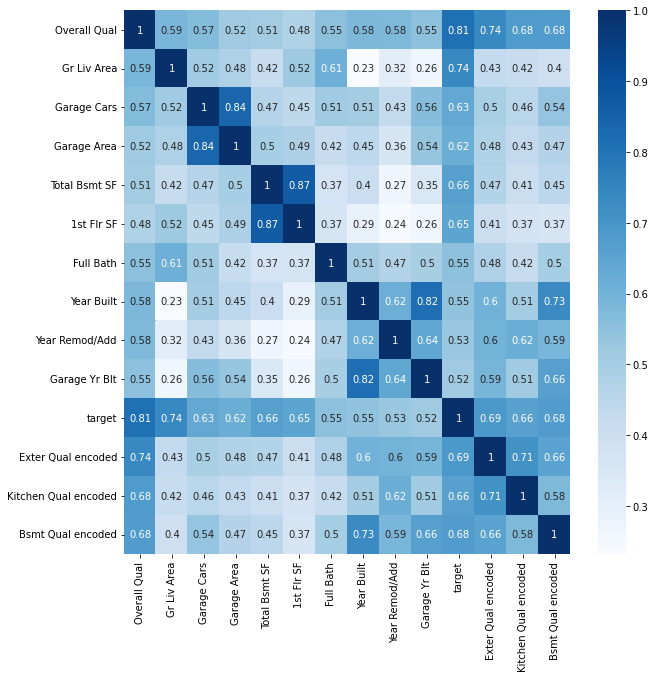

In [11]:
%matplotlib inline 
plt.figure(figsize=(10,10))
sns.heatmap(data = train[train.columns].corr(), annot=True, cmap='Blues')
plt.show() #인코딩된 변수 포함 상관계수 히트맵

In [12]:
train[train['Year Built'] > train['Year Remod/Add']] 
# 1950년이 너무 많아 혹시 리모델링 연도를 모르면 1950년이라고 적은 건 아닐까하여 완공연도보다 리모델링연도가 빠른 행이 있는지 찾아봤으나 그런 행은 존재하지 않네요!

Empty DataFrame
Columns: [Overall Qual, Gr Liv Area, Exter Qual, Garage Cars, Garage Area, Kitchen Qual, Total Bsmt SF, 1st Flr SF, Bsmt Qual, Full Bath, Year Built, Year Remod/Add, Garage Yr Blt, target, Exter Qual encoded, Kitchen Qual encoded, Bsmt Qual encoded]
Index: []

In [13]:
train[train['Garage Yr Blt'] == 2010] 
# Garage Yr Blt가 2010년인 행의 경우, Year Built, Year Remod/Add도 2010년이기 때문에 잘못입력된 것 같지는 않네요!

Overall Qual  Gr Liv Area Exter Qual  Garage Cars  Garage Area  \
687             9         1856         Gd            3          834   

    Kitchen Qual  Total Bsmt SF  1st Flr SF Bsmt Qual  Full Bath  Year Built  \
687           Ex           1856        1856        Ex          1        2010   

     Year Remod/Add  Garage Yr Blt  target  Exter Qual encoded  \
687            2010           2010  394432                   4   

     Kitchen Qual encoded  Bsmt Qual encoded  
687                     5                  5

In [14]:
#Garage Yr Blt 2207년인 행 삭제
idx2207 = train[train['Garage Yr Blt'] == 2207].index
print(idx2207)
train.loc[250:260] #254행에 Garage Yr Blt를 보면 2207년이 입력되어있습니다.

Int64Index([254], dtype='int64')


Overall Qual  Gr Liv Area Exter Qual  Garage Cars  Garage Area  \
250             8         2340         Gd            3          787   
251             4          875         TA            2          728   
252             5          988         TA            1          276   
253             5          793         TA            1          240   
254             8         1564         Gd            2          502   
255             5         1051         TA            1          264   
256             7         1958         Gd            2          499   
257             5         1211         TA            2          576   
258             7         1802         TA            1          216   
259             8         1836         Gd            2          517   
260             6         1314         Gd            2          440   

    Kitchen Qual  Total Bsmt SF  1st Flr SF Bsmt Qual  Full Bath  Year Built  \
250           Gd           1236        1236        Gd          2        1996   
251           Gd            385         875        TA          1        1972   
252           TA            876         988        TA          1        1950   
253           Fa            793         793        TA          1        1945   
254           Ex           1546        1564        Gd          2        2006   
255           TA           1051        1051        TA          1        1966   
256           Gd            779        1029        Gd          2        1994   
257           TA            864        1211        TA          1        1962   
258           TA            793         901        Fa          1        1920   
259           Gd           1836        1836        Gd          2        2008   
260           Gd           1314        1314        Gd          2        2006   

     Year Remod/Add  Garage Yr Blt  target  Exter Qual encoded  \
250            1996           1996  306000                   4   
251            2006           1975  117000                   3   
252            1950           1950  119000                   3   
253            1950           1945  113000                   3   
254            2007           2207  267300                   4   
255            1966           1966  124400                   3   
256            2001           1994  220000                   4   
257            2002           1972  144000                   3   
258            1950           1920  200100                   3   
259            2009           2009  264500                   4   
260            2006           2006  176432                   4   

     Kitchen Qual encoded  Bsmt Qual encoded  
250                     4                  4  
251                     4                  3  
252                     3                  3  
253                     2                  3  
254                     5                  4  
255                     3                  3  
256                     4                  4  
257                     3                  3  
258                     3                  2  
259                     4                  4  
260                     4                  4

In [15]:
#Garage Yr Blt 2207년인 행 삭제
train = train.drop(idx2207)
train.loc[250:260] #254번 행을 삭제했습니다.

Overall Qual  Gr Liv Area Exter Qual  Garage Cars  Garage Area  \
250             8         2340         Gd            3          787   
251             4          875         TA            2          728   
252             5          988         TA            1          276   
253             5          793         TA            1          240   
255             5         1051         TA            1          264   
256             7         1958         Gd            2          499   
257             5         1211         TA            2          576   
258             7         1802         TA            1          216   
259             8         1836         Gd            2          517   
260             6         1314         Gd            2          440   

    Kitchen Qual  Total Bsmt SF  1st Flr SF Bsmt Qual  Full Bath  Year Built  \
250           Gd           1236        1236        Gd          2        1996   
251           Gd            385         875        TA          1        1972   
252           TA            876         988        TA          1        1950   
253           Fa            793         793        TA          1        1945   
255           TA           1051        1051        TA          1        1966   
256           Gd            779        1029        Gd          2        1994   
257           TA            864        1211        TA          1        1962   
258           TA            793         901        Fa          1        1920   
259           Gd           1836        1836        Gd          2        2008   
260           Gd           1314        1314        Gd          2        2006   

     Year Remod/Add  Garage Yr Blt  target  Exter Qual encoded  \
250            1996           1996  306000                   4   
251            2006           1975  117000                   3   
252            1950           1950  119000                   3   
253            1950           1945  113000                   3   
255            1966           1966  124400                   3   
256            2001           1994  220000                   4   
257            2002           1972  144000                   3   
258            1950           1920  200100                   3   
259            2009           2009  264500                   4   
260            2006           2006  176432                   4   

     Kitchen Qual encoded  Bsmt Qual encoded  
250                     4                  4  
251                     4                  3  
252                     3                  3  
253                     2                  3  
255                     3                  3  
256                     4                  4  
257                     3                  3  
258                     3                  2  
259                     4                  4  
260                     4                  4

In [16]:
train = train.reset_index(drop=True)
train.loc[250:260]

Overall Qual  Gr Liv Area Exter Qual  Garage Cars  Garage Area  \
250             8         2340         Gd            3          787   
251             4          875         TA            2          728   
252             5          988         TA            1          276   
253             5          793         TA            1          240   
254             5         1051         TA            1          264   
255             7         1958         Gd            2          499   
256             5         1211         TA            2          576   
257             7         1802         TA            1          216   
258             8         1836         Gd            2          517   
259             6         1314         Gd            2          440   
260             5         1363         Gd            1          288   

    Kitchen Qual  Total Bsmt SF  1st Flr SF Bsmt Qual  Full Bath  Year Built  \
250           Gd           1236        1236        Gd          2        1996   
251           Gd            385         875        TA          1        1972   
252           TA            876         988        TA          1        1950   
253           Fa            793         793        TA          1        1945   
254           TA           1051        1051        TA          1        1966   
255           Gd            779        1029        Gd          2        1994   
256           TA            864        1211        TA          1        1962   
257           TA            793         901        Fa          1        1920   
258           Gd           1836        1836        Gd          2        2008   
259           Gd           1314        1314        Gd          2        2006   
260           TA           1008        1363        TA          1        1951   

     Year Remod/Add  Garage Yr Blt  target  Exter Qual encoded  \
250            1996           1996  306000                   4   
251            2006           1975  117000                   3   
252            1950           1950  119000                   3   
253            1950           1945  113000                   3   
254            1966           1966  124400                   3   
255            2001           1994  220000                   4   
256            2002           1972  144000                   3   
257            1950           1920  200100                   3   
258            2009           2009  264500                   4   
259            2006           2006  176432                   4   
260            2000           1951  164900                   4   

     Kitchen Qual encoded  Bsmt Qual encoded  
250                     4                  4  
251                     4                  3  
252                     3                  3  
253                     2                  3  
254                     3                  3  
255                     4                  4  
256                     3                  3  
257                     3                  2  
258                     4                  4  
259                     4                  4  
260                     3                  3

In [20]:
test = test_data.drop('id', axis=1)
test['Exter Qual encoded'] = test['Exter Qual'].map(category_map)
test['Kitchen Qual encoded'] = test['Kitchen Qual'].map(category_map)
test['Bsmt Qual encoded'] = test['Bsmt Qual'].map(category_map)

drop = ['Exter Qual','Kitchen Qual', 'Bsmt Qual']
train = train.drop(drop,axis=1)
test = test.drop(drop, axis=1)


In [22]:
from pycaret.regression import *
reg = setup(data = train, target = 'target', normalize = True, session_id = 0 )

In [23]:
def NMAE(true, pred): # NMAE의 경우 pycaret에서 지원하지 않습니다. 
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score 

In [25]:
add_metric('NMAE', 'NMAE', NMAE, greater_is_better = False) # add metric을 사용하면 pycaret에 custom metric을 사용할 수 있습니다!

Name                                                       NMAE
Display Name                                               NMAE
Score Function            <function NMAE at 0x0000013E699E6C80>
Scorer               make_scorer(NMAE, greater_is_better=False)
Target                                                     pred
Args                                                         {}
Greater is Better                                         False
Custom                                                     True
Name: NMAE, dtype: object

In [26]:
best = compare_models(sort= 'NMAE',n_select=3) #상위 모델 3개를 선택합니다

In [27]:
blend = blend_models(estimator_list= best, fold=5, optimize='NMAE') #voting regressor로 블렌딩합니다.
pred_holdout = predict_model(blend)

In [28]:
final_model = finalize_model(blend)
pred= predict_model(final_model, test)

In [34]:
pred['Label'].head()

0    324665.544682
1    127858.191145
2    177951.188749
3    279319.265620
4    132264.333849
Name: Label, dtype: float64

In [30]:
submission = pd.read_csv("housing/sample_submission.csv")
submission.head()

id  target
0   1       0
1   2       0
2   3       0
3   4       0
4   5       0

In [32]:
submission['target'] = pred['Label']
submission.head()

id         target
0   1  324665.544682
1   2  127858.191145
2   3  177951.188749
3   4  279319.265620
4   5  132264.333849

In [33]:
submission.to_csv("housing.csv",index=False)